# House Price Prediction: Exploratory Data Analysis and Regression Analysis 

The aim of this study is to ***use exploratory data analysis (EDA) and regression analysis to predict house price values with a model that's as accurate as possible***. 

We will perform a *univariate* analysis (one involving a single explanatory variable) as well as a *multivariate* one (involving multiple explanatory variables). Then, we select a model that best predict the data. 

For this notebook, we're going to use the Real Estate dataset, "Real estate.csv". This is a very common dataset for practicing regression analysis and is actually freely available on Kaggle, [here](https://www.kaggle.com/quantbruce/real-estate-price-prediction).

This project will have the following structure: 

**1. Sourcing and loading** 
- Import relevant libraries
- Load the data 
- Exploring the data
 
**2. Cleaning and transforming**
- Removing unneeded variables 
- Choosing a dependent variable
  
**3. Visualizing**
- Visualizing variable distributions and correlations
  
**4. Modeling** 
- Data splitting into Training and Testing Sets
- Firts model: Univariate linear regression model
- Second model: Multiple linear regression

**5. Evaluating and concluding** 
- Which model was best?

### 1. Sourcing and loading

#### Import relevant libraries 

In [110]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
#---------------------------------
import matplotlib.pyplot as plt 
from matplotlib import style 
import seaborn as sns # For all our visualization needs.
#--------------------------------------------------------
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot # For visualling evaluating predictions.
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split # For splitting the data.
from sklearn import linear_model, preprocessing 
from sklearn import metrics
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

#### Data Source and Information
Data from kaggle website Real estate price prediction regression analysis, mutiple regression,linear regression, and prediction. 


I am still searching for more information about the variables in this data set. For instance:

1) Number of convenience stores: Is this the number within one square kilometer or mile?

2) House age: Are these values number of years?

3) Distance to the nearest MRT station: Are distance in meters or miles?

4) House price of unit area:  Are these prices per meter squared?

#### Load the data

In [3]:
# Load the csv file containging the data.  
data = pd.read_csv("Real_Estate.csv")

#### Exploring the data

In [4]:
# Check the loaded data 
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
# Print out the dimensions of the data set 
print(f"The data set has {data.shape[0]} rows (observations) and {data.shape[1]} columns (variables).")

The data set has 414 rows (observations) and 8 columns (variables).


In [6]:
# Get an overview of the data variables types 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [7]:
# Verify that this data set does not have any Null Values 
data.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

### 2. Cleaning and transforming

In [8]:
# Since the 'No' and 'X1 transaction date' columns don't provide useful information for our price prediction model,
# we can drop them.
data.drop(['No', 'X1 transaction date'], axis=1, inplace=True)

In [9]:
# Check the updated data set after droping the unneeded columns.
data.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [10]:
# Rename the data columns 
columns_name = ['house age', 'distance to the nearest MRT station', 'number of convenience stores', 'latitude', 'longitude',
       'house price of unit area']
data.columns=columns_name
data.head()

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [11]:
# Get an statistical summary of the data set
data.describe()

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


#### Choosing a dependent variable

We select the "house price of unit area" as the dependent variable for the house price predicted model. This continous variable is suitable for regression analysis. 

In [18]:
data[['house price of unit area']].describe()

,house price of unit area
count,414.000000
mean,37.980193
std,13.606488
min,7.600000
25%,27.700000
50%,38.450000
75%,46.600000
max,117.500000


In [20]:
# Check out correlation between variables. Remark: correlation value is a number between -1 and 1. 
data.corr()

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
house age,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
distance to the nearest MRT station,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
number of convenience stores,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
latitude,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
house price of unit area,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


### 3. Visualizing 

#### Visualizing variable distributions and correlations 
We examine relationships among data variables by plotting the pairwise relationships in the dataset.

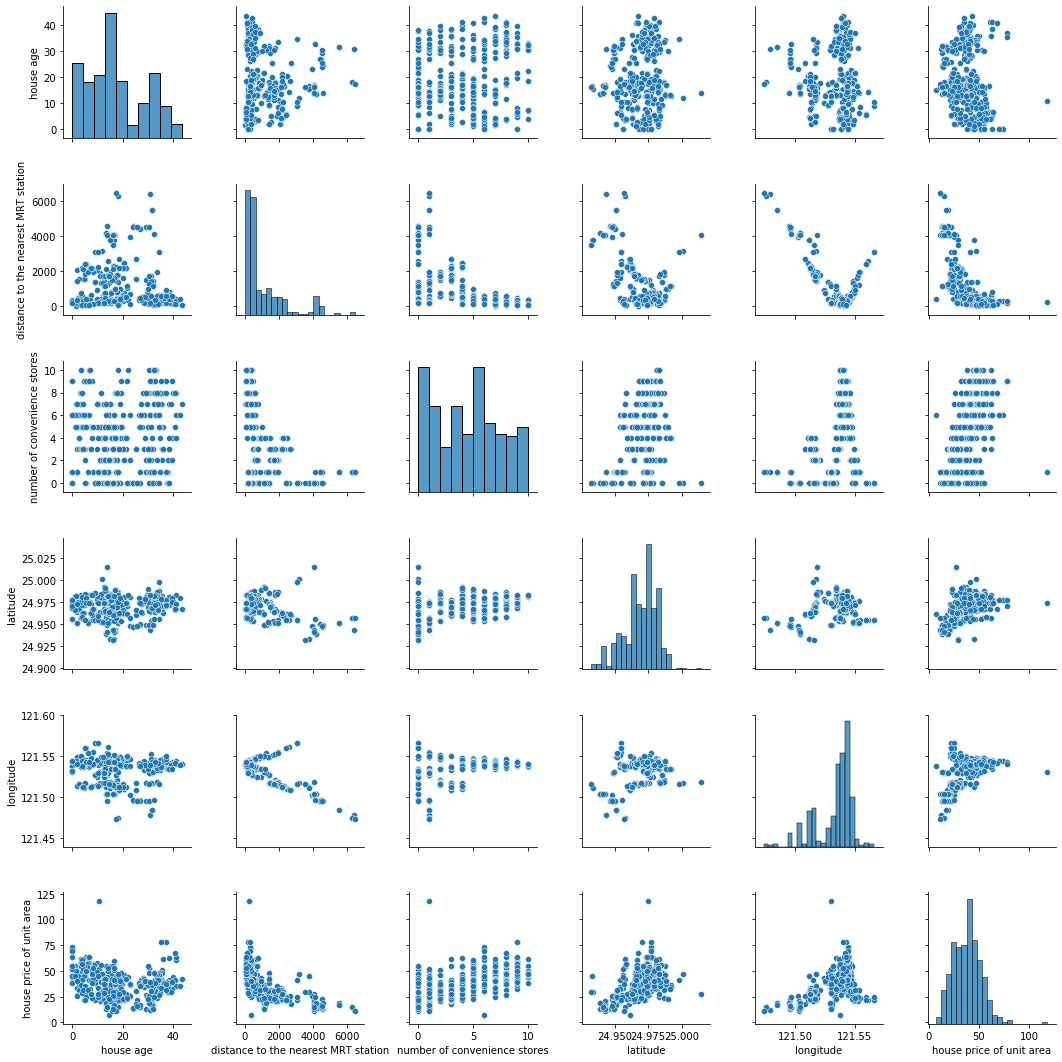

In [21]:
# Compute pairwise relationships calling pairplot() method on sns object. This calcualtion takes a long time to execute because is performing a lot of operations. 
sns.pairplot(data);

From the pairplot we can observe that the selected dependent variable 'house price of unit area' shows a negative relationship with the variables 'house age' and 'distance to the nearest MRT station', and a positive relationship with the 'number of convenience stores', 'latitude', and 'longitude' variables. 

The **house price of unit area** distribution has a long right tail.

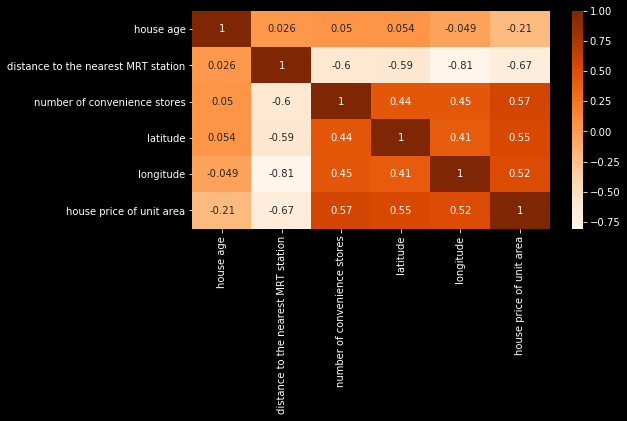

In [17]:
# Plot the correlation matrix as a heatmap using a black background with "style" from matplotlib
plt.figure(figsize=(8,4))
style.use("dark_background")
sns.heatmap(data.corr(), annot=True, cmap='Oranges');

The heatmap plot shows the annotated correlation values among all variables and the dark orange color represent higher positive correlations, while the light orange colors represent negative correlations. There is a relatively strong negative correlation between the "house price of unit area" and the "house age" (correlation = -0.21) and the "distance to the nearest MRT station" (correlation = -0.67) variables. 

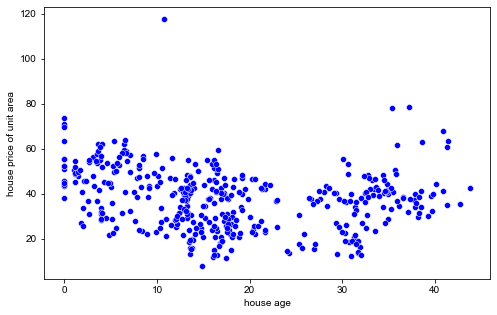

In [22]:
# Call the scatterplot() method on the sns object, with parameters: x = independent variable, y = dependent variable,
# and data=data, to make a scatter plot of the dependent variable vs the selected independent variable.
x = "house age"
y = "house price of unit area"
plt.figure(figsize=(8,5))
sns.scatterplot(x=x, y=y, data=data, color='b')
style.use('seaborn-white')
plt.xlabel(x);

From the scatter plot, we can see a negative linear correlation between the dependent variable "house price of unit area" and the independent variable "house age".

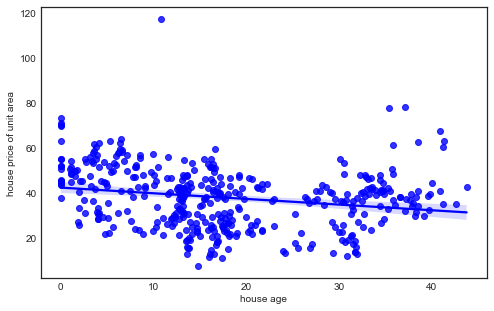

In [23]:
# Call the regplot() method on the sns object, with parameters: x = independent variable, y = dependent variable,
# and data=data, to make this correlation more clear 
plt.figure(figsize=(8,5))
sns.regplot(x=x, y=y, data=data, color='b');

The line of best fit matches the overall shape of the data, but it's clear that there are some points that deviate from the line, rather than all clustering close. 

### 4. Modeling 

####  Data splitting into training and testing sets
We split the dataset into training and testing sets. We train with 75% of the data and test on the remaining 25%. 

For the first model, we focus on two variables: house price of unit area as the dependent variable, and house age as the sole independent predictor variable. 

We'll be using [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) here. 

In [92]:
# Subsetting the data into the dependent and independent variables.
# Create a variable called 'X' and assign it the selected independent variable.
# Create a variable called 'y' (that's right, lower case) and assign it the selected dependent variable. 
# Using double brackets allows us to use the column headings. 
X = data[["house age"]] 
y = data[["house price of unit area"]]

# Split the data. This line uses the sklearn function train_test_split().
# Already done, from sklearn.model_selection import train_test_split # For splitting the data.
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
# The random_state parameter allows our work to be checked and replicated by other data scientists
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [51]:
# Check the shape of the X train, y_train, X_test and y_test to make sure the proportions are right. 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(310, 1) (310, 1)
(104, 1) (104, 1)


#### First Model: Univariate linear regression model 
Sklearn has a [LinearRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) function built into the linear_model module. We'll be using that to make our regression model. 

In [30]:
# Create the univariate linear regression model, which will be called ULR_Model, and assign it linear_model.LinearRegression(normalize=True).
# Already done, from sklearn import linear_model, preprocessing 
# Note: the normalize=True parameter enables the handling of different scales of the variables. 
ULR_Model = linear_model.LinearRegression(normalize=True)

In [53]:
# Next, train the model on the test data.
# Call the .fit() method of ULR_Model, and plug in X-train, y_train as parameters, in that order.
ULR_Model.fit(X_train, y_train)

LinearRegression(normalize=True)

In [54]:
# The coefficient of the independent variable is
coeff = pd.DataFrame(ULR_Model.coef_, X_train.columns, columns=['coefficient'])
coeff

,coefficient
house age,-0.271203


In [32]:
# Evaluate the model by printing the result of calling .score() on ULR_Model, with parameters X_train, y_train. 
print(ULR_Model.score(X_train, y_train))

0.05137388826172562


The above score is called R-Squared coefficient, or the "coefficient of determination". It's basically a measure of how successfully our model predicts the variations in the data away from the mean: 1 would mean a perfect model that explains 100% of the variation. At the moment, our model explains only about 5% of the variation from the mean. 

In [55]:
# Use the model to make predictions about the test data
# Let y_pred be the result of calling the predict() method on ULR_Model. Plug X_test into that method.
y_pred = ULR_Model.predict(X_test)

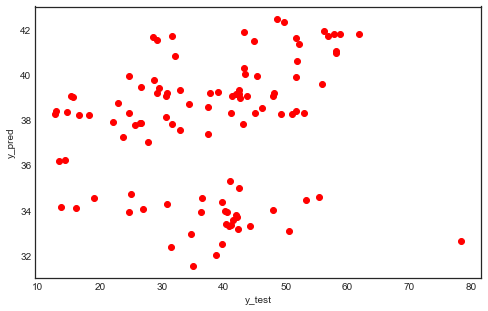

In [56]:
# Make a scatter plot of the predictions against the actual result. 
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='r')
plt.xlabel('y_test')
plt.ylabel('y_pred');

The above scatterplot represents how well the predictions match the actual results. 

Along the x-axis, we have the actual house age, and along the y-axis we have the predicted value for the house price of unit area. It's clear that this model is not maximally accurate.

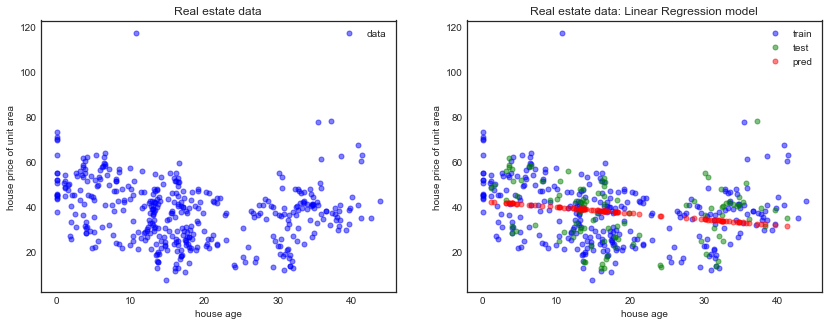

In [35]:
# In addition, show scatter plots of the predictions and the actual values.
dataName = 'Real estate data'
indVar = "house age"
depVar = "house price of unit area"
kwargs = {'marker':'.', 'linestyle':'none', 'alpha':0.5, 'markersize':10}
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(X, y, color='blue', label='data', **kwargs)
plt.legend(loc='best')
plt.xlabel(f"{indVar}") 
plt.ylabel(f"{depVar}")
plt.title(f'{dataName}')
plt.subplot(1,2,2)
plt.plot(X_train, y_train, color='blue', label='train', **kwargs )
plt.plot(X_test, y_test, color='green', label='test', **kwargs);
plt.plot(X_test, y_pred, color='red', label='pred', **kwargs);
plt.legend(loc='best')
#plt.axis([0.990, 1.004, 4, 16.5])
plt.xlabel(f"{indVar}") 
plt.ylabel(f"{depVar}")
plt.title(f'{dataName}: Linear Regression model');

The red line shows a theoretically perfect correlation between our actual and predicted values - the line that would exist if every prediction was completely correct. It's clear that while our points have a generally similar direction, they don't match the red line at all; we still have more work to do. 

To get a better predictive model, we should use more than one variable.

#### Second Model: Multiple linear regression model
Including more than one explanatory variable into a linear regression analysis is known as ***multiple linear regression***. 

In [99]:
# Create test and train datasets
# This is again very similar, but now we include more columns in the predictors
# Include all columns from data in the explanatory variables X except house price of unit area
X = data.drop(["house price of unit area"], axis=1)

# Reassign X the value of adding a constant to it. This is required for Ordinary Least Squares (OLS) Regression.
# Further explanation of this can be found here: 
# https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html
X = sm.add_constant(X)
y = data[["house price of unit area"]]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [100]:
# Check the X data
X.head()

,const,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude
0,1.0,32.0,84.87882,10,24.98298,121.54024
1,1.0,19.5,306.59470,9,24.98034,121.53951
2,1.0,13.3,561.98450,5,24.98746,121.54391
3,1.0,13.3,561.98450,5,24.98746,121.54391
4,1.0,5.0,390.56840,5,24.97937,121.54245


In [101]:
# Create the multiple linear regression model 
MLR_Model = sm.OLS(y_train, X_train)

# Fit the model
MLR_Model_results = MLR_Model.fit()

In [102]:
# Evaluate the model
MLR_Model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     house price of unit area   R-squared:                       0.543
Model:                                  OLS   Adj. R-squared:                  0.536
Method:                       Least Squares   F-statistic:                     72.38
Date:                      Fri, 15 Jan 2021   Prob (F-statistic):           1.00e-49
Time:                              17:21:47   Log-Likelihood:                -1131.9
No. Observations:                       310   AIC:                             2276.
Df Residuals:                           304   BIC:                             2298.
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                               -3065.1407   7507.623     -0.408      0.683   -1.78e+04    1.17e+04
house age                              -0.2675      0.047     -5.716      0.000      -0.360      -0.175
distance to the nearest MRT station    -0.0045      0.001     -5.224      0.000      -0.006      -0.003
number of convenience stores            1.1090      0.229      4.843      0.000       0.658       1.560
latitude                              238.7363     52.405      4.556      0.000     135.614     341.859
longitude                             -23.4746     59.633     -0.394      0.694    -140.820      93.870
==============================================================================
Omnibus:                      190.854   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3006.150
Skew:                           2.200   Prob(JB):                         0.00
Kurtosis:                      17.607   Cond. No.                     2.34e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R-Squared score shows a big improvement - The first model predicted only around 5% of the variation, but now we are predicting 54%.

In [103]:
# Use the new model to make predictions
y_pred = MLR_Model_results.predict(X_test)

In [104]:
y_pred.head()

188    43.328030
404    45.653047
191    38.988138
101    41.074910
210    47.584014
dtype: float64

In [93]:
df = y_test
df.columns = ['actual']

In [105]:
df['predictions'] = round(y_pred)
df.head()

,actual,predictions
188,44.3,43.0
404,41.2,46.0
191,37.8,39.0
101,32.9,41.0
210,52.2,48.0


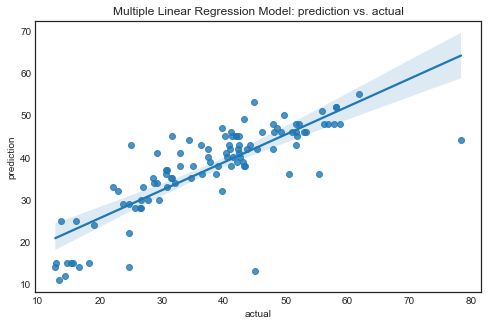

In [106]:
# Plot the predictions making a scatterplot
plt.figure(figsize=(8,5))
sns.regplot('actual','predictions',data=df)
plt.title("Multiple Linear Regression Model: prediction vs. actual")
plt.xlabel("actual")
plt.ylabel("prediction");

We've now got a much closer match between the data and the predictions, and we can see that the shape of the data points is much more similar to the red line. 

### 5. Evaluating and concluding

In [111]:
# Mean absolute error(MAE)
print('MAE',metrics.mean_absolute_error(y_test,y_pred))
# Mean squared error(MSE)
print('MSE',metrics.mean_squared_error(y_test,y_pred))
# Root mean squared error(RMSE)
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE 5.23600983280972
MSE 56.40621125284156
RMSE 7.510406863335804


The RMSE tells us how far, on average, our predictions were mistaken. An RMSE of 0 would mean we were making perfect predictions. 7.5 signifies that we are, on average, about 7.5 of a unit of fixed acidity away from the correct answer. 

### Conclusions 

The multiple linear regression model outperforme the univariate linear model.